## Import Modules

In [26]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam

from tensorflow import keras
import systemcheck

## MFCC Feature Extraction

In [27]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=100)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

## Load the Dataset

In [28]:
audio_dataset_path = 'Emotions dataset/'

data_folder = os.listdir(audio_dataset_path)
try:
    data_folder.remove(".DS_Store")
except:
    pass

extracted_features = []
for path in data_folder:
    for file in os.listdir(audio_dataset_path+path+"/"):
        if file.lower().endswith(".wav"):
            file_name = audio_dataset_path+path+"/"+file
            data = features_extractor(file_name) 
            extracted_features.append([data, (path.split("_")[-1]).lower()])

extracted_features

[[array([-1.75780624e+02,  1.11266884e+02,  8.08960533e+00,  3.01773853e+01,
          7.73319483e+00,  9.95189953e+00,  1.05180416e+01,  4.31841326e+00,
         -1.91844406e+01,  8.65778542e+00,  2.46113777e+00,  7.95329380e+00,
          1.86983740e+00, -4.86942911e+00, -1.57420444e+00,  3.74328196e-01,
         -7.78175545e+00,  4.07657337e+00, -2.31451011e+00, -1.68413746e+00,
         -5.05797863e-01,  2.65177917e+00, -3.77179623e-01, -1.60480335e-01,
          1.11715722e+00,  5.78953791e+00, -3.21081853e+00, -2.16713643e+00,
         -3.64920139e+00,  3.77564311e-01, -5.51477098e+00,  1.28414404e+00,
         -2.65682983e+00, -1.63831019e+00, -2.97326708e+00,  1.34578252e+00,
         -9.15270448e-01, -3.43779534e-01, -2.30021858e+00,  2.61710376e-01,
         -1.51606715e+00,  1.64471054e+00, -3.19253516e+00, -1.53450310e-01,
         -2.23865747e+00,  1.20448279e+00, -2.54459858e+00,  2.03813219e+00,
         -1.28857112e+00,  7.95690477e-01, -1.50818861e+00, -1.51373172e+00,

## Dataframe creation

In [29]:
df = pd.DataFrame(extracted_features,columns=['feature','class'])
df

,feature,class
0,"[-175.78062, 111.266884, 8.089605, 30.177385, ...",angry
1,"[-383.43262, 52.460808, -17.608944, -11.81031,...",angry
2,"[-444.5501, 65.29204, -2.571654, -20.355955, -...",angry
3,"[-402.1927, 26.256584, -5.02363, -0.40751916, ...",angry
4,"[-383.49704, 52.38679, -11.5349, -13.975939, -...",angry
...,...,...
2797,"[-391.5477, 61.473328, 34.779984, 42.554768, -...",sad
2798,"[-404.34048, 76.25154, 25.959827, 39.57593, 0....",sad
2799,"[-370.4846, 65.6685, 38.36494, 41.20847, -4.55...",sad
2800,"[-423.07797, 69.03684, 29.720037, 37.226368, -...",sad


In [30]:
df['class'].value_counts()

class
angry       401
happy       401
disgust     400
fear        400
neutral     400
surprise    400
sad         400
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='class', ylabel='count'>

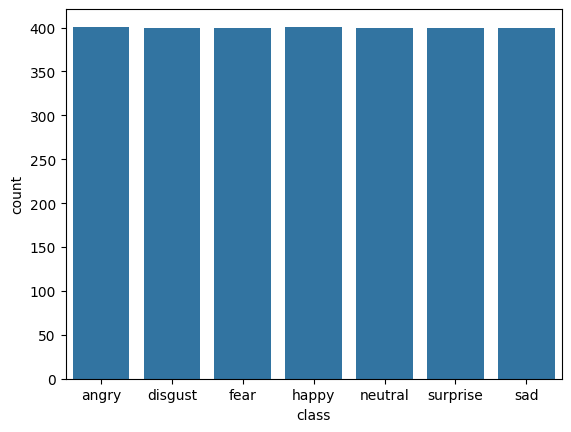

In [31]:
sns.countplot(data=df, x='class')

## Data Visualization

In [32]:
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

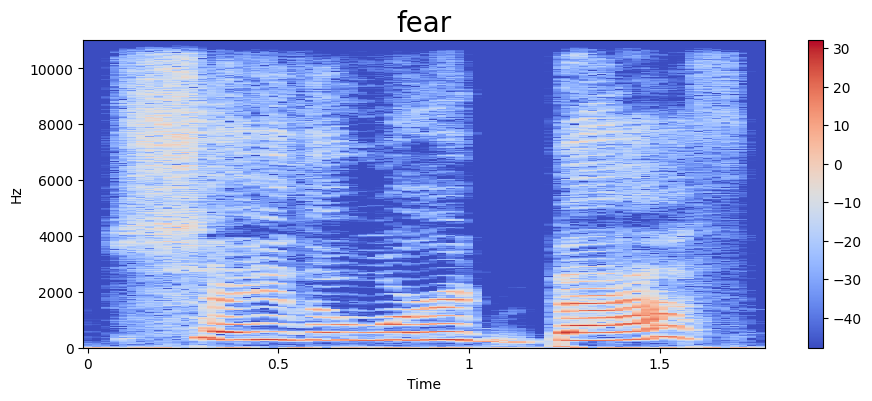

In [33]:
emotion = 'fear'
path = r"Emotions dataset\Fear\OAF_bath_fear.wav"
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

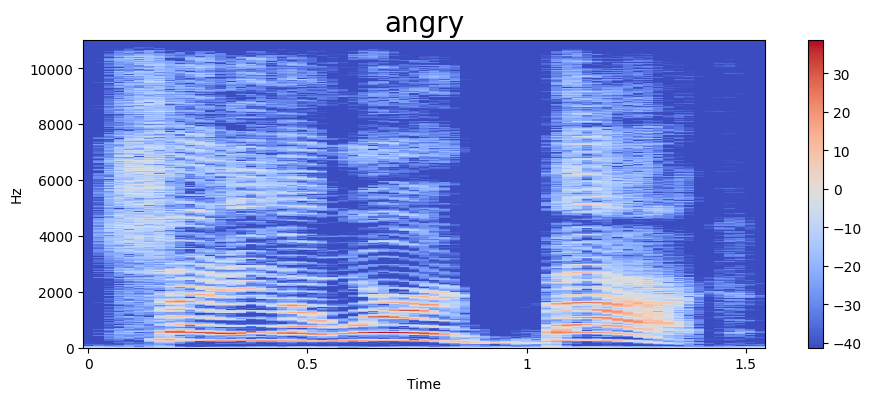

In [34]:
emotion = 'angry'
path = "Emotions dataset\Angry\OAF_back_angry.wav"
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

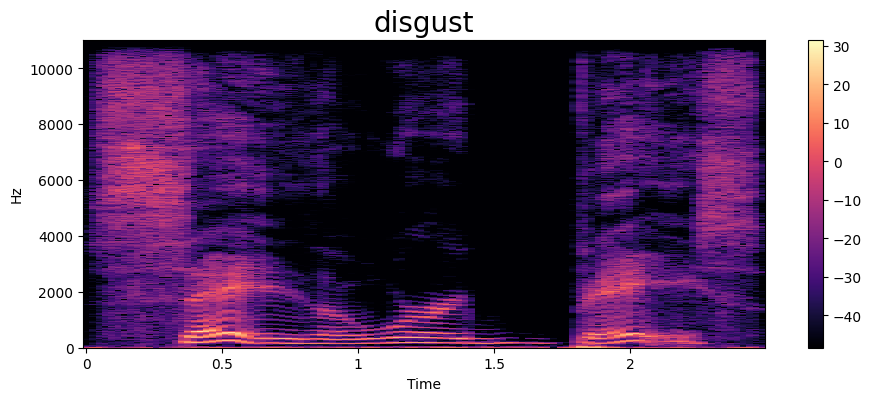

In [35]:
emotion = 'disgust'
path = "Emotions dataset\Disgust\OAF_base_disgust.wav"
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

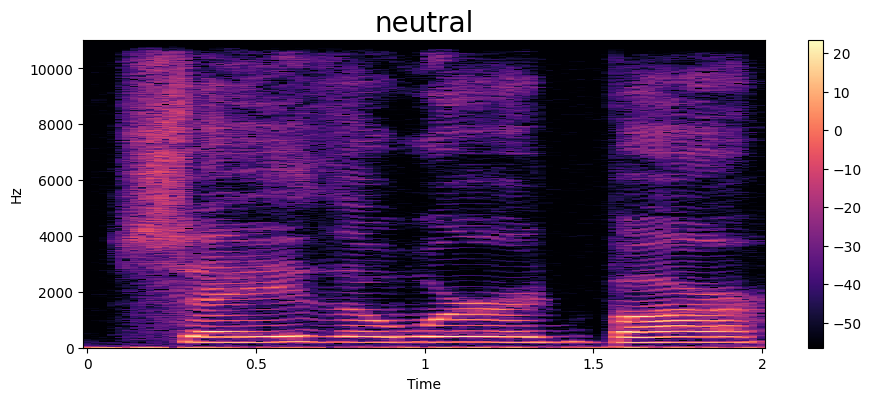

In [36]:
emotion = 'neutral'
path = r"Emotions dataset\Neutral\OAF_bar_neutral.wav"
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

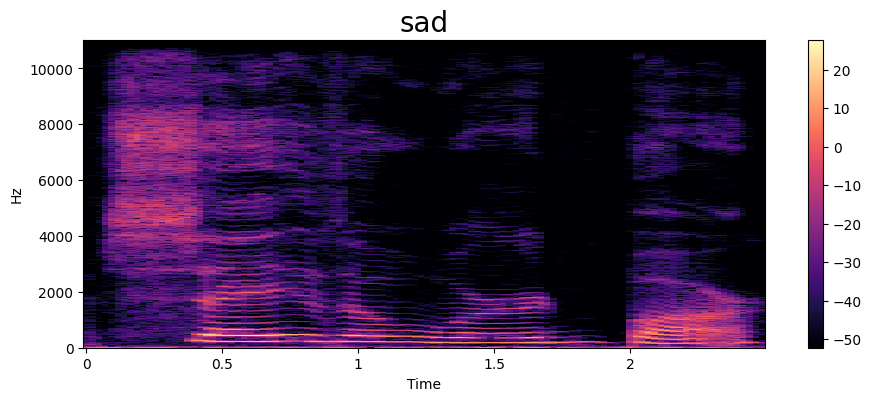

In [37]:
emotion = 'sad'
path = "Emotions dataset\Sad\OAF_bar_sad.wav"
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

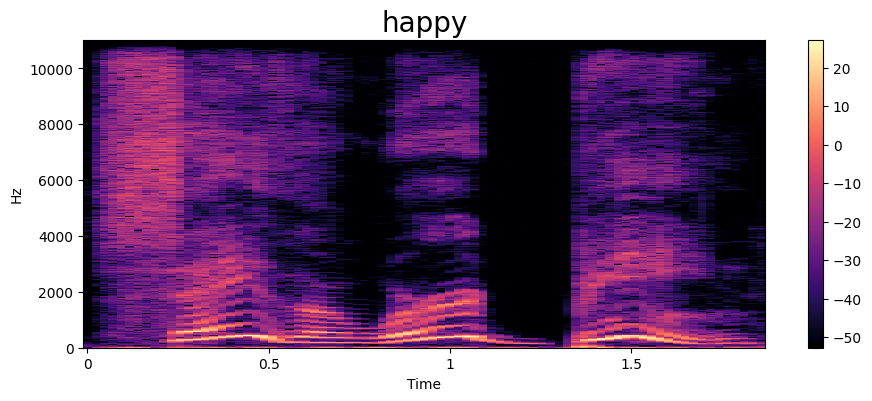

In [38]:
emotion = 'happy'
path = "Emotions dataset\Happy\OAF_bean_happy.wav"
data, sampling_rate = librosa.load(path)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Data pre-processing

In [39]:
X_mfcc = df['feature']

In [40]:
X_mfcc

0       [-175.78062, 111.266884, 8.089605, 30.177385, ...
1       [-383.43262, 52.460808, -17.608944, -11.81031,...
2       [-444.5501, 65.29204, -2.571654, -20.355955, -...
3       [-402.1927, 26.256584, -5.02363, -0.40751916, ...
4       [-383.49704, 52.38679, -11.5349, -13.975939, -...
                              ...                        
2797    [-391.5477, 61.473328, 34.779984, 42.554768, -...
2798    [-404.34048, 76.25154, 25.959827, 39.57593, 0....
2799    [-370.4846, 65.6685, 38.36494, 41.20847, -4.55...
2800    [-423.07797, 69.03684, 29.720037, 37.226368, -...
2801    [-409.69104, 53.418983, 32.701664, 39.78903, 3...
Name: feature, Length: 2802, dtype: object

In [41]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2802, 100)

In [42]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2802, 100, 1)

## Data conversion (One-Hot Encoding)

In [43]:
enc = OneHotEncoder()
y = enc.fit_transform(df[['class']])

In [44]:
y = y.toarray()

In [45]:
y.shape

(2802, 7)

## Data Sampling

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)

In [47]:
X_train.shape

(2241, 100, 1)

## Building the LSTM Model

In [48]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(100,1)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(set(df['class'])), activation='softmax')
])

adam_fine = Adam(learning_rate=0.00005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer= "adam", metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

## Model training

In [49]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=64)

Epoch 1/200


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.1654 - loss: 1.9306 - val_accuracy: 0.2918 - val_loss: 1.8711
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.2619 - loss: 1.8093 - val_accuracy: 0.3764 - val_loss: 1.5838
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.3626 - loss: 1.5435 - val_accuracy: 0.4900 - val_loss: 1.3415
Epoch 4/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.3996 - loss: 1.4291 - val_accuracy: 0.4766 - val_loss: 1.2177
Epoch 5/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.4498 - loss: 1.3246 - val_accuracy: 0.4655 - val_loss: 1.2801
Epoch 6/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - accuracy: 0.4747 - loss: 1.2590 - val_accuracy: 0.5924 - val_loss: 1.0862
Epoch 7/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.4823 - loss: 1.1886 - val_accuracy: 0.5813 - val_loss: 1.0656
Epoch 8/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.5555 - loss: 1.0768 - val_accuracy: 0.5679 - val

## Model Evaluation

In [50]:
_, acc = model.evaluate(X_train, y_train)
print("Train Accuracy : ", acc)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9447 - loss: 0.2080
Train Accuracy :  0.9451137781143188


In [51]:
_, acc = model.evaluate(X_test, y_test)
print("Train Accuracy : ", acc)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9299 - loss: 0.2774
Train Accuracy :  0.9411764740943909


In [52]:
model.save("files/Emotion_recognition_model.h5")

***************************************************************************

***************************************************************************

***************************************************************************

## Model Testing on Training data

In [53]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name) 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=100)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [54]:
def Predict_Label(audio_file):
    model = keras.models.load_model("files/Emotion_recognition_model.h5")
    data = features_extractor(audio_file)
    x = np.array(data.tolist())
    X = x.reshape(1, 100, 1)
    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    y_pred = int(np.median(y_pred))
    # Convert prediction to sentiment category
    sentiment_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Pleasent surprise", "Sad"]
    result = sentiment_labels[y_pred]
    return result

In [55]:
Predict_Label(r"Emotions dataset/Neutral/OAF_base_neutral.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


'Neutral'

In [56]:
Predict_Label(r"Emotions dataset\Angry\OAF_bath_angry.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


'Angry'

In [57]:
Predict_Label(r"Emotions dataset\Happy\OAF_base_happy.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


'Disgust'

In [58]:
Predict_Label(r"Emotions dataset\Disgust\OAF_bean_disgust.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


'Disgust'

In [59]:
Predict_Label(r"Emotions dataset\Fear\OAF_bath_fear.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


'Fear'

In [60]:
Predict_Label(r"Emotions dataset\Pleasent_Surprise\OAF_base_ps.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


'Sad'

**************************************************

**************************************************

## Testing on Sample data

In [61]:
Predict_Label(r"files/sad.wav")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


'Disgust'